In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,roc_curve,auc,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

In [3]:
#Read the data file and transform into dataframe
df_Forest = pd.read_excel(r'D:/Datasets/Forest.xlsx')

print(df_Forest.columns)
#Check the dataframe to see whether it has missing values and the data type of each column
print(df_Forest.isnull().sum())
print(df_Forest.dtypes)

Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')
class                  0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
b8                     0
b9                     0
pred_minus_obs_H_b1    0
pred_minus_obs_H_b2    0
pred_minus_obs_H_b3    0
pred_minus_obs_H_b4    0
pred_minus_obs_H_b5    0
pred_minus_obs_H_b6    0
pred_minus_obs_H_b7    0
pred_minus_obs_H_b8    0
p

In [5]:
#Split the dataframe into predictors and target columns
predictors = df_Forest.iloc[:,1:]
target = df_Forest.iloc[:,0]

#Split the predictor and target sets into training and testing sets
predi_train, predi_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3,random_state=100)

In [6]:
#Enlabel the non-numeric column
class_le = LabelEncoder()
target_train = class_le.fit_transform(target_train)
target_test = class_le.transform(target_test)

#Standardise the predictors for Decision Tree classifier
scaler1 = StandardScaler()
predi_train_tree = scaler1.fit_transform(predi_train)
predi_test_tree = scaler1.transform(predi_test)
    #Standardise the whole predictors for cross-validation
predictors_tree = scaler1.fit_transform(predictors)

#Normalise the predictors for MultiLayer Perceptron
scaler2 = MinMaxScaler()
predi_train_MLP = scaler2.fit_transform(predi_train)
predi_test_MLP = scaler2.transform(predi_test)
    #Normalise the whole predictors for cross-validation
predictors_MLP = scaler2.fit_transform(predictors)

In [7]:
#Build Decision Tree classifier and make predictions
    #Determine the best max_depth parameter for Decision Tree by mean-square-error
accuracies=[]
depths=[]
samples_split=[]
samples_leaf =[]

for x in range(1,11):
    for y in range(10,50):
        for z in range(5,50):
            clf_tree_try = DecisionTreeClassifier(criterion='entropy',max_depth=x,min_samples_split=y,min_samples_leaf=z,random_state=100)
            clf_tree_try.fit(predi_train_tree,target_train)
            predictions_tree = clf_tree_try.predict(predi_test_tree)
            accuracies.append(cross_val_score(clf_tree_try,predictors_tree,target,cv=3).mean())
            depths.append(x)
            samples_split.append(y)
            samples_leaf.append(z)

df_param_accu = pd.DataFrame({
    'Depth' : depths,
    'Min_samples_split' : samples_split,
    'Min_samples_leaf' : samples_leaf,
    'Accurarcy' : accuracies
})

df_param_accu.head()

,Depth,Min_samples_split,Min_samples_leaf,Accurarcy
0,1,10,5,0.625167
1,1,10,6,0.625167
2,1,10,7,0.625167
3,1,10,8,0.625167
4,1,10,9,0.625167


In [15]:
df_param_accu.sort_values(by=["Accurarcy"], ascending=False)

,Depth,Min_samples_split,Min_samples_leaf,Accurarcy
9318,6,17,8,0.866065
5717,4,17,7,0.866065
16518,10,17,8,0.866065
11118,7,17,8,0.866065
7518,5,17,8,0.866065
...,...,...,...,...
1099,1,34,24,0.625167
1100,1,34,25,0.625167
1101,1,34,26,0.625167
1102,1,34,27,0.625167


In [17]:
    #Based on the graph in the above section, the best max_depth of the Decision Tree classifier is 4, now build the tree
clf_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=17, max_depth=4, min_samples_leaf=7, random_state=100)
clf_tree.fit(predi_train_tree, target_train)
predictions_tree = clf_tree.predict(predi_test_tree)

The accuracy of Decision Tree classifier is:  0.8598726114649682
The average accuracy score of Decision Tree under cross validation is:  0.8660645867542419


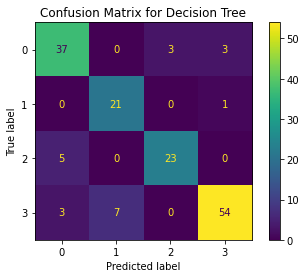

In [18]:
#Plot Confusion Matrices for Decision Tree and MLP classifiers and calculate their accuracies
    #For Decision Tree
plot_conmatrix_tree = plot_confusion_matrix(clf_tree,predi_test_tree,target_test)
plot_conmatrix_tree.ax_.set_title('Confusion Matrix for Decision Tree')

print('The accuracy of Decision Tree classifier is: ',accuracy_score(target_test,predictions_tree))
print("The average accuracy score of Decision Tree under cross validation is: ",cross_val_score(clf_tree,predictors_tree,target,cv=3).mean())

The accuracy of Multilayer Perceptron classifier is:  0.8535031847133758
The average accuracy score of MLP under cross validation is:  0.8239846743295018


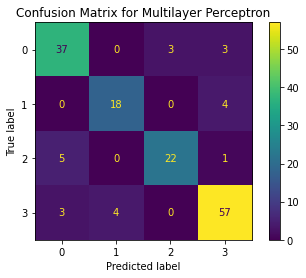

In [26]:
#Build Multilayer Perceptron and make predictions
clf_MLP = MLPClassifier(random_state=100, tol=5e-3)
clf_MLP.fit(predi_train_MLP,target_train)
predictions_MLP = clf_MLP.predict(predi_test_MLP)

    #For MLP
plot_conmatrix_MLP = plot_confusion_matrix(clf_MLP,predi_test_MLP,target_test)
plot_conmatrix_MLP.ax_.set_title('Confusion Matrix for Multilayer Perceptron')
print('The accuracy of Multilayer Perceptron classifier is: ',accuracy_score(target_test,predictions_MLP))
print("The average accuracy score of MLP under cross validation is: ",cross_val_score(clf_MLP,predictors_MLP,target,cv=3).mean())
plt.show()

In [27]:
    #Generate probability table for both classifiers
prob_tree = clf_tree.predict_proba(predi_test_tree)
prob_MLP = clf_MLP.predict_proba(predi_test_MLP)
    #Probability table for the first sample
probability_table_sample1 = pd.DataFrame([[prob_tree[0][0],prob_MLP[0][0]],
                                 [prob_tree[0][1],prob_MLP[0][1]],
                                 [prob_tree[0][2],prob_MLP[0][2]],
                                 [prob_tree[0][3],prob_MLP[0][3]]],
                                 columns=['Decision Tree','MLP'], index=['Class_d','Class_h','Class_o','Class_s'])
print(probability_table_sample1)

         Decision Tree       MLP
Class_d            0.0  0.065112
Class_h            0.0  0.000574
Class_o            1.0  0.934120
Class_s            0.0  0.000195


In [36]:
 #Determine the class of the i-th sample
def Clf_DT_MLP_Aggregate(i):
    ##create a DataFrame containing all the samples and their probabilities in each class with regard to each classifier
    samples=[]
    class_b_proba = []
    class_h_proba = []
    class_o_proba = []
    class_s_proba = []
    for a in range(len(target_test)):
        samples.append(a)
        samples.append(a)
        class_b_proba.append(prob_tree[a][0])
        class_b_proba.append(prob_MLP[a][0])
        class_h_proba.append(prob_tree[a][1])
        class_h_proba.append(prob_MLP[a][1])
        class_o_proba.append(prob_tree[a][2])
        class_o_proba.append(prob_MLP[a][2])
        class_s_proba.append(prob_tree[a][3])
        class_s_proba.append(prob_MLP[a][3])
    proba_table_DT_MLP = pd.DataFrame({
        'Samples': samples,
        'Class_b_proba' : class_b_proba,
        'Class_h_proba' : class_h_proba,
        'Class_o_proba' : class_o_proba,
        'Class_s_proba' : class_s_proba
    })
    #Use Aggregate and Average functions to generate a new table with the average probability of the two classifiers in each class grouped by 'Samples'
    proba_table_average = proba_table_DT_MLP.groupby('Samples').aggregate([np.average])
    #Reversely index the column number by the values and this column number is the class ID
    for y in range(4):
        if proba_table_average.iloc[i,y] == proba_table_average.max(axis=1)[i]:
            final_class = y
            #print('The No.{0} sample belongs to class {1}'.format(i,final_class))
    return final_class
    

In [38]:
predictions_DT_MLP = []
for i in range(len(target_test)):
    predictions_DT_MLP.append(Clf_DT_MLP_Aggregate(i))
accuracy_classifier_DT_MLP = accuracy_score(target_test,predictions_DT_MLP)
print('The accuracy of the Tree-MLP-combined classifier is: ',accuracy_classifier_DT_MLP)

The accuracy of the Tree-MLP-combined classifier is:  0.8789808917197452


In [39]:
# Pr(class=’s’|DT=’s’) is actually the precision of predicting class 's' by Decision Tree; Get all the precision scores of all the class-predictions
from sklearn.metrics import classification_report
report = classification_report(target_test,predictions_tree,output_dict=True)
precisions = {
    0:report['0']['precision'],
    1:report['1']['precision'],
    2:report['2']['precision'],
    3:report['3']['precision']
}
print(precisions)
def classifier_DT_MLP_conditional(i):
    samples = []
    classes =[]
    Proba_DT = []
    Proba_MLP = []
    samples.append(i)
    samples.append(i)
    samples.append(i)
    samples.append(i)
    classes.append(0)
    classes.append(1)
    classes.append(2)
    classes.append(3)
    Proba_DT.append(prob_tree[i][0])
    Proba_DT.append(prob_tree[i][1])
    Proba_DT.append(prob_tree[i][2])
    Proba_DT.append(prob_tree[i][3])
    Proba_MLP.append(prob_MLP[i][0])
    Proba_MLP.append(prob_MLP[i][1])
    Proba_MLP.append(prob_MLP[i][2])
    Proba_MLP.append(prob_MLP[i][3])
    proba_table_condition = pd.DataFrame({
        'Samples' : samples,
        'Classes' : classes,
        'Proba_DT' : Proba_DT,
        'Proba_MLP' : Proba_MLP
    })
    for a in range(4):
        if proba_table_condition.iloc[a,2]==proba_table_condition.max()[2]:
            max_class_DT = a
    for b in range(4):
        if proba_table_condition.iloc[b,3]==proba_table_condition.max()[3]:
            max_class_MLP = b
    
    P1 = proba_table_condition.max()[2] * precisions[max_class_DT]
    P2 = proba_table_condition.max()[3] * precisions[max_class_MLP]
    if P1 > P2: return max_class_DT
    else: return max_class_MLP
    
id = int(input('Input the sample_ID you want to predict its class: '))
print('The No.{0} sample belongs to class {1}'.format(id,classifier_DT_MLP_conditional(id)))

{0: 0.8222222222222222, 1: 0.75, 2: 0.8846153846153846, 3: 0.9310344827586207}
Input the sample_ID you want to predict its class: 1
The No.1 sample belongs to class 3
